In [1]:
from functions_for_all_nutrients import *
from iron_hemoglobin_functions import *

In [2]:
username = !whoami
username

['alibow']

In [3]:
index_cols=['location_id','sex_id','age_group_id']

age_group_ids = [2,3,4,5]
sex_ids = [1,2]
coverage_levels = [0.2,0.5,0.8]
years = [2021,2022,2023,2024,2025]

In [4]:
coverage_data_dir = f'/ihme/homes/{username[0]}/notebooks/vivarium_research_lsff/data_prep/outputs/lsff_input_coverage_data.csv'

In [5]:
location_ids = (list(
                pd.read_csv(coverage_data_dir)
                .location_id
                .unique()))
location_ids

[161,
 201,
 202,
 205,
 171,
 179,
 163,
 11,
 180,
 184,
 15,
 164,
 214,
 165,
 196,
 190,
 189,
 20]

In [6]:
nutrient = 'iron'
vehicles = ['wheat flour', 'maize flour']
effective_fractions = [0, 
                       0, 
                       0.1666666667, 
                       0.9166666667]

In [7]:
pd.read_csv(coverage_data_dir).sub_population.unique()

array(['total population', nan, 'women of reproductive age', 'under-5',
       '8-59 months', 'children 12-36 months',
       'households with children <2 years old'], dtype=object)

In [8]:
sub_populations = ['total population', np.nan, 'under-5',
       '8-59 months', 'children 12-36 months',
       'households with children <2 years old']

In [9]:
baseline_coverage, counterfactual_coverage = generate_overall_coverage_rates(
                                                     coverage_data_dir,
                                                     nutrient, 
                                                     vehicles,
                                                     coverage_levels,
                                                     years,
                                                     location_ids,
                                                    sub_populations)

# HEMOGLOBIN

In [10]:
from scipy.stats import norm

# mean and 0.975-quantile of normal distribution for mean difference (MD)
mean = 3
q_975 = 6.1

# 0.975-quantile of standard normal distribution (=1.96, approximately)
q_975_stdnorm = norm().ppf(0.975)

std = (q_975 - mean) / q_975_stdnorm # std dev of normal distribution

# Frozen normal distribution for MD, representing uncertainty in our effect size
hb_md_distribution = norm(mean, std)

In [11]:
mean_difference_hemoglobin_fort = generate_normal_rr_deficiency_nofort_draws(mean, std, location_ids)
mean_difference_hemoglobin_fort.head()

draws,draw_0,draw_1,draw_10,draw_100,draw_101,draw_102,draw_103,draw_104,draw_105,draw_106,...,draw_990,draw_991,draw_992,draw_993,draw_994,draw_995,draw_996,draw_997,draw_998,draw_999
location_id,,,,,,,,,,,,,,,,,,,,,
161,5.67384,2.263045,2.010783,1.632669,3.592127,3.619293,0.71747,3.769218,2.099288,5.25659,...,2.68253,2.315703,4.976409,5.670455,1.949907,3.061148,3.881265,2.227427,2.005891,1.92852
201,5.67384,2.263045,2.010783,1.632669,3.592127,3.619293,0.71747,3.769218,2.099288,5.25659,...,2.68253,2.315703,4.976409,5.670455,1.949907,3.061148,3.881265,2.227427,2.005891,1.92852
202,5.67384,2.263045,2.010783,1.632669,3.592127,3.619293,0.71747,3.769218,2.099288,5.25659,...,2.68253,2.315703,4.976409,5.670455,1.949907,3.061148,3.881265,2.227427,2.005891,1.92852
205,5.67384,2.263045,2.010783,1.632669,3.592127,3.619293,0.71747,3.769218,2.099288,5.25659,...,2.68253,2.315703,4.976409,5.670455,1.949907,3.061148,3.881265,2.227427,2.005891,1.92852
171,5.67384,2.263045,2.010783,1.632669,3.592127,3.619293,0.71747,3.769218,2.099288,5.25659,...,2.68253,2.315703,4.976409,5.670455,1.949907,3.061148,3.881265,2.227427,2.005891,1.92852


In [12]:
effective_baseline_coverage = get_effective_iron_hemoglobin_coverage(baseline_coverage, 
                                                                     sex_ids, 
                                                                     age_group_ids, 
                                                                     effective_fractions, 
                                                                     years)
effective_counterfactual_coverage = get_effective_iron_hemoglobin_coverage(counterfactual_coverage, 
                                                                     sex_ids, 
                                                                     age_group_ids, 
                                                                     effective_fractions, 
                                                                     years)

delta_effective_coverage = effective_counterfactual_coverage - effective_baseline_coverage
delta_effective_coverage

draw_0  \
location_id sex_id age_group_id vehicle     year coverage_level             
11          1      2            wheat flour 2021 0.2             0.000000   
                                                 0.5             0.000000   
                                                 0.8             0.000000   
                                            2022 0.2             0.000000   
                                                 0.5             0.000000   
...                                                                   ...   
214         2      5            wheat flour 2024 0.5             0.197694   
                                                 0.8             0.316311   
                                            2025 0.2             0.079078   
                                                 0.5             0.197694   
                                                 0.8             0.316311   

                                                                   draw_1  \
location_id sex_id age_group_id vehicle     year coverage_level             
11          1      2            wheat flour 2021 0.2             0.000000   
                                                 0.5             0.000000   
                                                 0.8             0.000000   
                                            2022 0.2             0.000000   
                                                 0.5             0.000000   
...                                                                   ...   
214         2      5            wheat flour 2024 0.5             0.197652   
                                                 0.8             0.316243   
                                            2025 0.2             0.079061   
                                                 0.5             0.197652   
                                                 0.8             0.316243   

                                                                   draw_2  \
location_id sex_id age_group_id vehicle     year coverage_level             
11          1      2            wheat flour 2021 0.2             0.000000   
                                                 0.5             0.000000   
                                                 0.8             0.000000   
                                            2022 0.2             0.000000   
                                                 0.5             0.000000   
...                                                                   ...   
214         2      5            wheat flour 2024 0.5             0.197654   
                                                 0.8             0.316247   
                                            2025 0.2             0.079062   
                                                 0.5             0.197654   
                                                 0.8             0.316247   

                                                                   draw_3  \
location_id sex_id age_group_id vehicle     year coverage_level             
11          1      2            wheat flour 2021 0.2             0.000000   
                                                 0.5             0.000000   
                                                 0.8             0.000000   
                                            2022 0.2             0.000000   
                                                 0.5             0.000000   
...                                                                   ...   
214         2      5            wheat flour 2024 0.5             0.197581   
                                                 0.8             0.316130   
                                            2025 0.2             0.079032   
                                                 0.5             0.197581   
                                                 0.8             0.316130   

                                                           

In [13]:
mean_hgb = generate_hemoglobin_values(delta_effective_coverage, 
                                      mean_difference_hemoglobin_fort,
                                      location_ids, age_group_ids, sex_ids)
mean_hgb.to_csv('anemia_files_u5/mean_hgb.csv')
mean_hgb

/ihme/homes/alibow/notebooks/vivarium_research_lsff/multiplication_models/iron_hemoglobin_functions.py:121: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  ignore_index=True)


draw_0  \
location_id vehicle     sex_id age_group_id year_id coverage_level               
11          wheat flour 1      2            NaN     baseline        162.537335   
                               3            NaN     baseline        128.108577   
                               4            NaN     baseline        116.694047   
                               5            NaN     baseline        124.209700   
                        2      2            NaN     baseline        162.373339   
...                                                                        ...   
214         wheat flour 2      5            2024.0  0.5             101.240665   
                                                    0.8             101.913677   
                                            2025.0  0.2             100.567653   
                                                    0.5             101.240665   
                                                    0.8             101.913677   

                                                                        draw_1  \
location_id vehicle     sex_id age_group_id year_id coverage_level               
11          wheat flour 1      2            NaN     baseline        161.366817   
                               3            NaN     baseline        132.713336   
                               4            NaN     baseline        118.048532   
                               5            NaN     baseline        118.689308   
                        2      2            NaN     baseline        167.888409   
...                                                                        ...   
214         wheat flour 2      5            2024.0  0.5             102.286599   
                                                    0.8             102.554976   
                                            2025.0  0.2             102.018221   
                                                    0.5             102.286599   
                                                    0.8             102.554976   

                                                                       draw_10  \
location_id vehicle     sex_id age_group_id year_id coverage_level               
11          wheat flour 1      2            NaN     baseline        175.149845   
                               3            NaN     baseline        135.965175   
                               4            NaN     baseline        108.423498   
                               5            NaN     baseline        124.179081   
                        2      2            NaN     baseline        161.528363   
...                                                                        ...   
214         wheat flour 2      5            2024.0  0.5              98.903164   
                                                    0.8              99.141595   
                                            2025.0  0.2              98.664733   
                                                    0.5              98.903164   
                                                    0.8              99.141595   

                                                                      draw_100  \
location_id vehicle     sex_id age_group_id year_id coverage_level               
11          wheat flour 1      2            NaN     baseline        165.142201   
                               3            NaN     baseline        124.548957   
                               4            NaN     baseline        113.084533   
                               5            NaN     baseline        121.421113   
                        2      2            NaN     baseline        171.131066   
...                                                                        ...   
214         wheat flour 2      5            2024.0  0.5             100.718160   
                                                    0.8             100.911842   
                                            2025.0 

In [14]:
hgb_sd = get_draws('modelable_entity_id',
                10488,
                source='epi',
                location_id=location_ids,
                age_group_id=age_group_ids,
                sex_id=sex_ids,
                year_id=2019,
                gbd_round_id=6,
                decomp_step='step4',
                status='best')
(hgb_sd.set_index(['location_id','sex_id','age_group_id'])
 .filter([c for c in hgb_sd if 'draw' in c])
 .reset_index()).to_csv('anemia_files_u5/sd_hgb.csv')

In [15]:
# NOW RUN HEMOGLOBIN_TO_ANEMIA.R FILE BEFORE RUNNING NEXT CELL
#assert "Did you run the R file?" == "Double check :)", "Make sure you run the R file!"

In [16]:
anemia = load_anemia_prev_and_calculate_ylds('anemia_files_u5/anemia_prev.csv')
baseline_anemia = (duplicate_over_simulation_years(anemia.loc[anemia.coverage_level=='baseline'], years)
                   .drop(columns='coverage_level')
                   .set_index(['location_id','vehicle','age_group_id','sex_id','year','draw']))
counterfactual_anemia = (anemia.loc[anemia.coverage_level != 'baseline']
                         .set_index(['location_id','vehicle','age_group_id','sex_id','year','draw','coverage_level']))
averted_anemia = baseline_anemia - counterfactual_anemia
averted_anemia

mild  \
location_id vehicle     age_group_id sex_id year draw     coverage_level             
11          maize flour 2            1      2021 draw_0   NaN                  NaN   
                                                 draw_1   NaN                  NaN   
                                                 draw_10  NaN                  NaN   
                                                 draw_100 NaN                  NaN   
                                                 draw_101 NaN                  NaN   
...                                                                            ...   
214         wheat flour 5            2      2025 draw_998 0.5             0.000453   
                                                          0.8             0.000845   
                                                 draw_999 0.2             0.000223   
                                                          0.5             0.000610   
                                                          0.8             0.001059   

                                                                          moderate  \
location_id vehicle     age_group_id sex_id year draw     coverage_level             
11          maize flour 2            1      2021 draw_0   NaN                  NaN   
                                                 draw_1   NaN                  NaN   
                                                 draw_10  NaN                  NaN   
                                                 draw_100 NaN                  NaN   
                                                 draw_101 NaN                  NaN   
...                                                                            ...   
214         wheat flour 5            2      2025 draw_998 0.5             0.010278   
                                                          0.8             0.016402   
                                                 draw_999 0.2             0.003526   
                                                          0.5             0.008798   
                                                          0.8             0.014050   

                                                                            severe  \
location_id vehicle     age_group_id sex_id year draw     coverage_level             
11          maize flour 2            1      2021 draw_0   NaN                  NaN   
                                                 draw_1   NaN                  NaN   
                                                 draw_10  NaN                  NaN   
                                                 draw_100 NaN                  NaN   
                                                 draw_101 NaN                  NaN   
...                                                                            ...   
214         wheat flour 5            2      2025 draw_998 0.5             0.000845   
                                                          0.8             0.001333   
                                                 draw_999 0.2             0.000406   
                                                          0.5             0.001003   
                                                          0.8             0.001583   

                                                                            anemic  \
location_id vehicle     age_group_id sex_id year draw     coverage_level             
11          maize flour 2            1      2021 draw_0   NaN                  NaN   
                                                 draw_1   NaN                  NaN   
                                                 draw_10  NaN                  NaN   
                                                 draw_100 NaN                  NaN   
                                                 draw_101 NaN                  NaN   
...                                                                            ...   
214         wheat flour 5        

In [17]:
counts, rates = population_weight_values(averted_anemia.reset_index(), age_group_ids, sex_ids, location_ids)

In [18]:
counts = summarize_data(counts)
rates = summarize_data(rates)

In [19]:
anemia_counts_averted = (counts.loc[counts.severity=='anemic']
     .loc[counts.measure=='ylds']
     .set_index(['location_id','vehicle','coverage_level','year'])
     .drop(columns=['severity','measure']))

anemia_rates_averted = (rates.loc[rates.severity=='anemic']
     .loc[rates.measure=='ylds']
     .set_index(['location_id','vehicle','coverage_level','year'])
     .drop(columns=['severity','measure']))
anemia_rates_averted.head()

draw                                           draw_0    draw_1   draw_10  \
location_id vehicle     coverage_level year                                 
11          wheat flour 0.2            2021  0.000000  0.000000  0.000000   
                        0.5            2021  0.000000  0.000000  0.000000   
                        0.8            2021  0.000000  0.000000  0.000000   
                        0.2            2022 -2.711588 -1.824356 -1.291389   
                        0.5            2022 -6.846463 -4.575899 -3.240642   

draw                                         draw_100  draw_101  draw_102  \
location_id vehicle     coverage_level year                                 
11          wheat flour 0.2            2021  0.000000  0.000000  0.000000   
                        0.5            2021  0.000000  0.000000  0.000000   
                        0.8            2021  0.000000  0.000000  0.000000   
                        0.2            2022 -1.130638 -2.822034 -1.970842   
                        0.5            2022 -2.835128 -7.092530 -4.957415   

draw                                         draw_103  draw_104  draw_105  \
location_id vehicle     coverage_level year                                 
11          wheat flour 0.2            2021  0.000000  0.000000  0.000000   
                        0.5            2021  0.000000  0.000000  0.000000   
                        0.8            2021  0.000000  0.000000  0.000000   
                        0.2            2022 -0.402080 -2.306425 -1.154678   
                        0.5            2022 -1.006404 -5.803115 -2.898483   

draw                                         draw_106  ...  draw_990  \
location_id vehicle     coverage_level year            ...             
11          wheat flour 0.2            2021  0.000000  ...  0.000000   
                        0.5            2021  0.000000  ...  0.000000   
                        0.8            2021  0.000000  ...  0.000000   
                        0.2            2022 -2.723070  ... -1.987515   
                        0.5            2022 -6.878987  ... -4.993200   

draw                                         draw_991  draw_992   draw_993  \
location_id vehicle     coverage_level year                                  
11          wheat flour 0.2            2021  0.000000  0.000000   0.000000   
                        0.5            2021  0.000000  0.000000   0.000000   
                        0.8            2021  0.000000  0.000000   0.000000   
                        0.2            2022 -1.637548 -3.040366  -4.643826   
                        0.5            2022 -4.109678 -7.661204 -11.692393   

draw                                         draw_994  draw_995  draw_996  \
location_id vehicle     coverage_level year                                 
11          wheat flour 0.2            2021  0.000000  0.000000  0.000000   
                        0.5            2021  0.000000  0.000000  0.000000   
                        0.8            2021  0.000000  0.000000  0.000000   
                        0.2            2022 -1.184338 -1.888201 -1.656153   
                        0.5            2022 -2.969621 -4.748423 -4.170717   

draw                                         draw_997  draw_998  draw_999  
location_id vehicle     coverage_level year                                
11          wheat flour 0.2            2021  0.000000  0.000000  0.000000  
                        0.5            2021  0.000000  0.000000  0.000000  
                        0.8            2021  0.000000  0.000000  0.000000  
                        0.2            2022 -1.414640 -1.114987 -0.863957  
                        0.5            2022 -3.550408 -2.796445 -2.166858  

[5 rows x 1000 columns]

In [20]:
# total iron responsive anemia burden
iron_responsive_anemia_sequelae = [1004, 1005, 1006, 1008, 1009, 1010, 1012, 1013, 
                                   1014, 1016, 1017, 1018, 1020, 1021, 1022, 1024, 1025, 1026, 
                                   1028, 1029, 1030, 1032, 1033, 1034, 1361, 1364, 1367, 1373, 1376, 
                                   1379, 1385, 1388, 1391, 1397, 1400, 1403, 1409, 1412, 1415, 1421, 
                                   1424, 1427, 1433, 1436, 1439, 1445, 1448, 1451, 5213, 5216, 5219, 
                                   5222, 5225, 5228, 5237, 5240, 5243, 5246, 5249, 5252, 5261, 5264, 
                                   5267, 5270, 5273, 5276, 4985, 4988, 4991, 4994, 4997, 5000, 5009, 
                                   5012, 5015, 5678, 5681, 5684, 7214, 7217, 7220, 4952, 4955, 4958, 
                                   4961, 4964, 4967, 4976, 4979, 4982, 5627, 5630, 5633, 7202, 7205, 
                                   7208, 5393, 5396, 5399, 182, 183, 184, 240, 241, 242, 177, 178, 
                                   179, 144,145,146,172,173,174,525,526,527,1106,1107,1108,537,538,
                                   539,206,207,208, 22989, 22990, 22991, 22992, 22993, 22999, 23000, 
                                   23001, 23002, 23003, 23009, 23010, 23011, 23012, 23013,
                                   5567, 5570, 5573, 5579, 5582, 5585,
                                   23030, 23031, 23032, 23034, 23035, 23036, 23038, 23039, 23040,
                                   23042, 23043, 23044, 23046, 23047, 23048]

ira_ylds = get_draws('sequela_id', iron_responsive_anemia_sequelae, 
                 source='como',
                 location_id=location_ids, 
                 age_group_id=age_group_ids,
                 sex_id=sex_ids,
                 year_id=2019,
                 measure_id=3,
                 decomp_step='step5',
                 gbd_round_id=6)
ira_ylds = ira_ylds.groupby(['location_id','sex_id','age_group_id'], as_index=False).sum()

pop = get_population(location_id=location_ids,
                    age_group_id=age_group_ids,
                    sex_id=sex_ids,
                    gbd_round_id=6,
                    year_id=2019,
                    decomp_step='step4')

ira_ylds = ira_ylds.merge(pop, on=['location_id','sex_id','age_group_id'])
for i in list(range(0,1000)):
    ira_ylds[f'draw_{i}'] = ira_ylds[f'draw_{i}'] * ira_ylds['population']
ira_ylds = ira_ylds.groupby(['location_id']).sum()
for i in list(range(0,1000)):
    ira_ylds[f'draw_{i}'] = ira_ylds[f'draw_{i}'] / ira_ylds['population'] * 100_000
ira_ylds = ira_ylds.drop(columns=[c for c in ira_ylds.columns if 'draw' not in c])
ira_ylds.head()

,draw_0,draw_1,draw_10,draw_100,draw_101,draw_102,draw_103,draw_104,draw_105,draw_106,...,draw_990,draw_991,draw_992,draw_993,draw_994,draw_995,draw_996,draw_997,draw_998,draw_999
location_id,,,,,,,,,,,,,,,,,,,,,
11,334.914343,449.263093,312.187773,371.093815,336.264462,333.130095,354.156542,324.446786,343.422797,195.863755,...,277.473307,384.770485,340.598940,446.805528,348.981431,294.134392,121.313252,246.787417,268.237555,207.969605
15,1609.951272,2134.896640,1636.070352,1996.148853,1266.332205,1798.158169,2402.252624,1430.798848,2330.966122,1270.446987,...,1502.438385,1839.651579,1398.844621,1721.311228,1336.721747,1695.889717,834.406314,1697.382614,1635.694403,1372.195891
20,526.466078,553.994150,600.407682,418.543595,221.388082,411.849792,370.077565,382.577208,565.761909,282.486003,...,450.961192,374.960253,406.362976,395.782476,346.155629,384.768319,239.205233,246.077775,384.852123,654.519577
161,1309.971271,1100.938247,871.735033,1178.864270,853.997440,887.995534,1185.751676,993.191289,1394.240084,699.974179,...,890.584371,1132.987544,977.608392,1111.075500,1267.866138,1211.418425,422.230480,872.434851,635.313862,835.508106
163,1892.548590,1776.260963,1404.685406,1752.609459,1452.245725,1708.810338,1833.642692,1374.829619,1948.984805,1157.058094,...,1390.509621,1671.151319,1658.863662,1479.985901,1508.159867,1641.553640,804.917947,1320.217765,1277.804721,1257.241748


In [21]:
# check iron responsive portion
impairment_anemia = get_draws(gbd_id_type='rei_id',
         gbd_id=[192],
         source='como',
         location_id=location_ids,
         sex_id=sex_ids,
         age_group_id=1,
         gbd_round_id=6,
         year_id=2019,
         decomp_step='step5',
         measure_id=[3])
impairment_anemia = impairment_anemia.loc[impairment_anemia.cause_id==294]
impairment_anemia = impairment_anemia.merge(pop, on=['location_id','sex_id'])
for i in list(range(0,1000)):
    impairment_anemia[f'draw_{i}'] = impairment_anemia[f'draw_{i}'] * impairment_anemia['population']
impairment_anemia = impairment_anemia.groupby(['location_id','measure_id','rei_id']).sum()
for i in list(range(0,1000)):
    impairment_anemia[f'draw_{i}'] = impairment_anemia[f'draw_{i}'] / impairment_anemia['population'] * 100_000
impairment_anemia = impairment_anemia.drop(columns=[c for c in impairment_anemia.columns if 'draw' not in c])
(ira_ylds / impairment_anemia).mean(axis=1)

location_id  measure_id  rei_id
11           3           192       0.882996
15           3           192       0.894140
20           3           192       0.875280
161          3           192       0.874950
163          3           192       0.841738
164          3           192       0.944990
165          3           192       0.876596
171          3           192       0.686937
179          3           192       0.894505
180          3           192       0.759371
184          3           192       0.777699
189          3           192       0.847804
190          3           192       0.665991
196          3           192       0.969324
201          3           192       0.732008
202          3           192       0.714081
205          3           192       0.675463
214          3           192       0.737197
dtype: float64

In [22]:
anemia_pifs = anemia_rates_averted / (ira_ylds) * 100
anemia_pifs.head()

draw                                           draw_0    draw_1   draw_10  \
location_id vehicle     coverage_level year                                 
11          wheat flour 0.2            2021  0.000000  0.000000  0.000000   
                        0.5            2021  0.000000  0.000000  0.000000   
                        0.8            2021  0.000000  0.000000  0.000000   
                        0.2            2022 -0.809636 -0.406077 -0.413658   
                        0.5            2022 -2.044243 -1.018534 -1.038043   

draw                                         draw_100  draw_101  draw_102  \
location_id vehicle     coverage_level year                                 
11          wheat flour 0.2            2021  0.000000  0.000000  0.000000   
                        0.5            2021  0.000000  0.000000  0.000000   
                        0.8            2021  0.000000  0.000000  0.000000   
                        0.2            2022 -0.304677 -0.839231 -0.591613   
                        0.5            2022 -0.763992 -2.109212 -1.488132   

draw                                         draw_103  draw_104  draw_105  \
location_id vehicle     coverage_level year                                 
11          wheat flour 0.2            2021  0.000000  0.000000  0.000000   
                        0.5            2021  0.000000  0.000000  0.000000   
                        0.8            2021  0.000000  0.000000  0.000000   
                        0.2            2022 -0.113532 -0.710879 -0.336226   
                        0.5            2022 -0.284169 -1.788618 -0.843998   

draw                                         draw_106  ...  draw_990  \
location_id vehicle     coverage_level year            ...             
11          wheat flour 0.2            2021  0.000000  ...  0.000000   
                        0.5            2021  0.000000  ...  0.000000   
                        0.8            2021  0.000000  ...  0.000000   
                        0.2            2022 -1.390288  ... -0.716291   
                        0.5            2022 -3.512129  ... -1.799525   

draw                                         draw_991  draw_992  draw_993  \
location_id vehicle     coverage_level year                                 
11          wheat flour 0.2            2021  0.000000  0.000000  0.000000   
                        0.5            2021  0.000000  0.000000  0.000000   
                        0.8            2021  0.000000  0.000000  0.000000   
                        0.2            2022 -0.425591 -0.892653 -1.039339   
                        0.5            2022 -1.068086 -2.249333 -2.616886   

draw                                         draw_994  draw_995  draw_996  \
location_id vehicle     coverage_level year                                 
11          wheat flour 0.2            2021  0.000000  0.000000  0.000000   
                        0.5            2021  0.000000  0.000000  0.000000   
                        0.8            2021  0.000000  0.000000  0.000000   
                        0.2            2022 -0.339370 -0.641952 -1.365187   
                        0.5            2022 -0.850939 -1.614372 -3.437973   

draw                                         draw_997  draw_998  draw_999  
location_id vehicle     coverage_level year                                
11          wheat flour 0.2            2021  0.000000  0.000000  0.000000  
                        0.5            2021  0.000000  0.000000  0.000000  
                        0.8            2021  0.000000  0.000000  0.000000  
                        0.2            2022 -0.573222 -0.415671 -0.415425  
                        0.5            2022 -1.438650 -1.042526 -1.041911  

[5 rows x 1000 columns]

In [23]:
anemia_pifs['measure'] = 'pif'
anemia_counts_averted['measure'] = 'counts_averted'
anemia_rates_averted['measure'] = 'rates_averted'
iron_u5_results = pd.concat([anemia_pifs.reset_index(),
                         anemia_counts_averted.reset_index(),
                         anemia_rates_averted.reset_index()],
                        ignore_index=True)
iron_u5_results.to_pickle('results_raw/iron_u5.pkl')

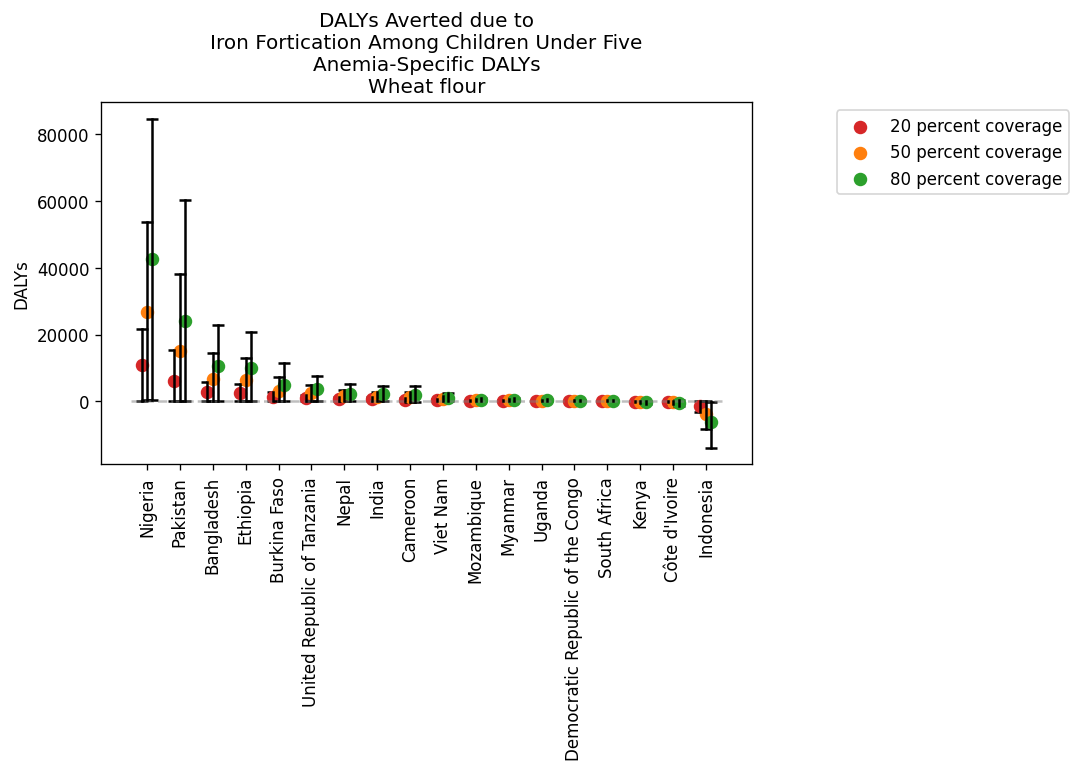

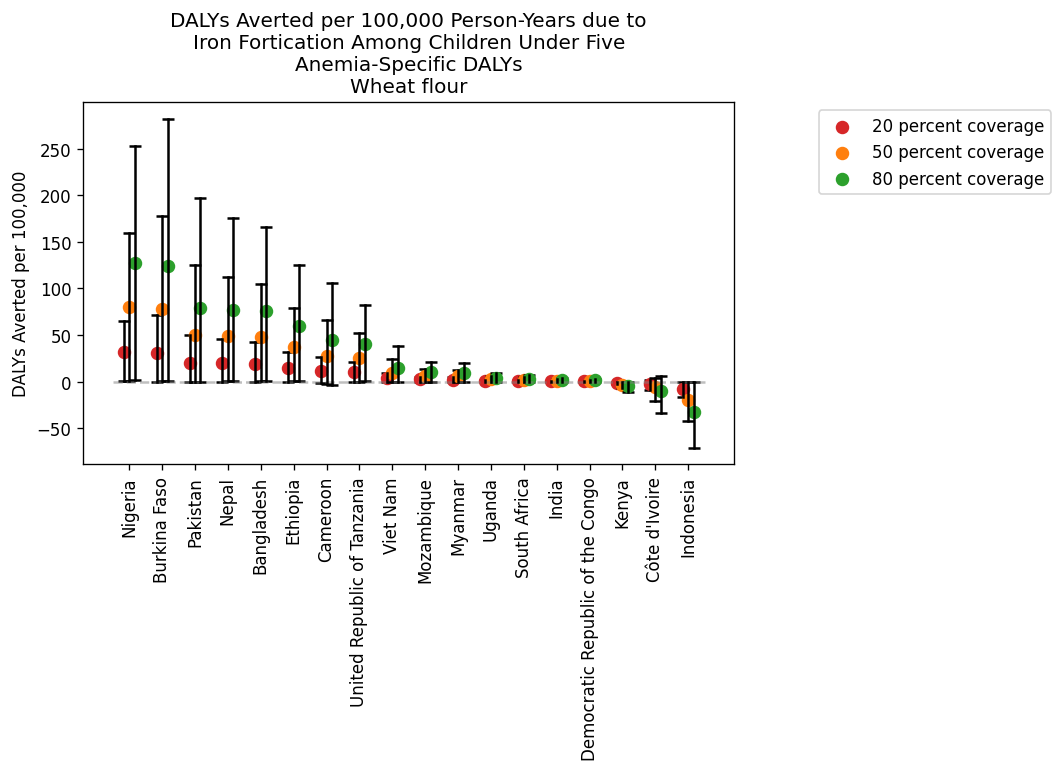

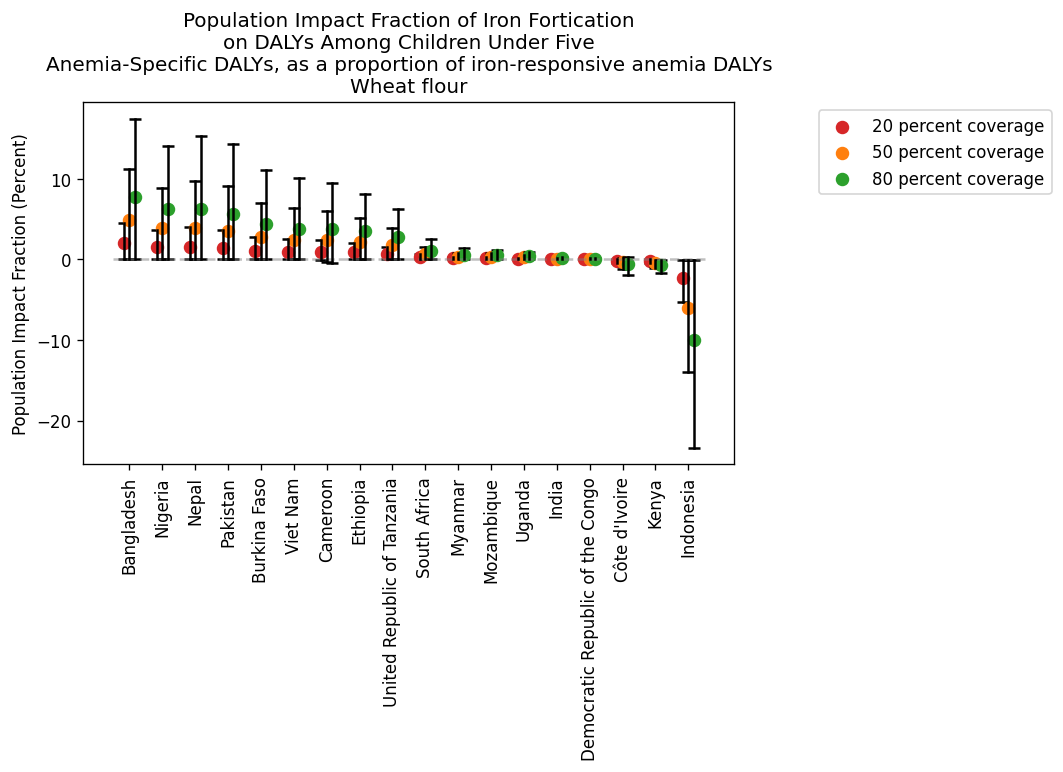

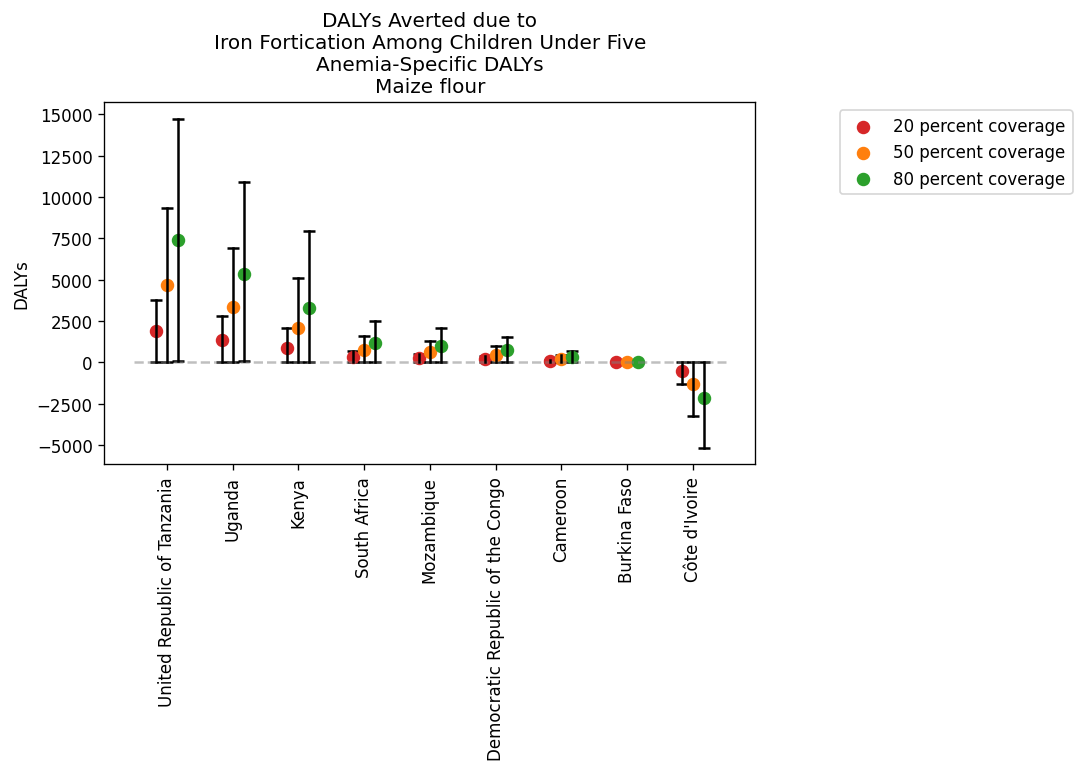

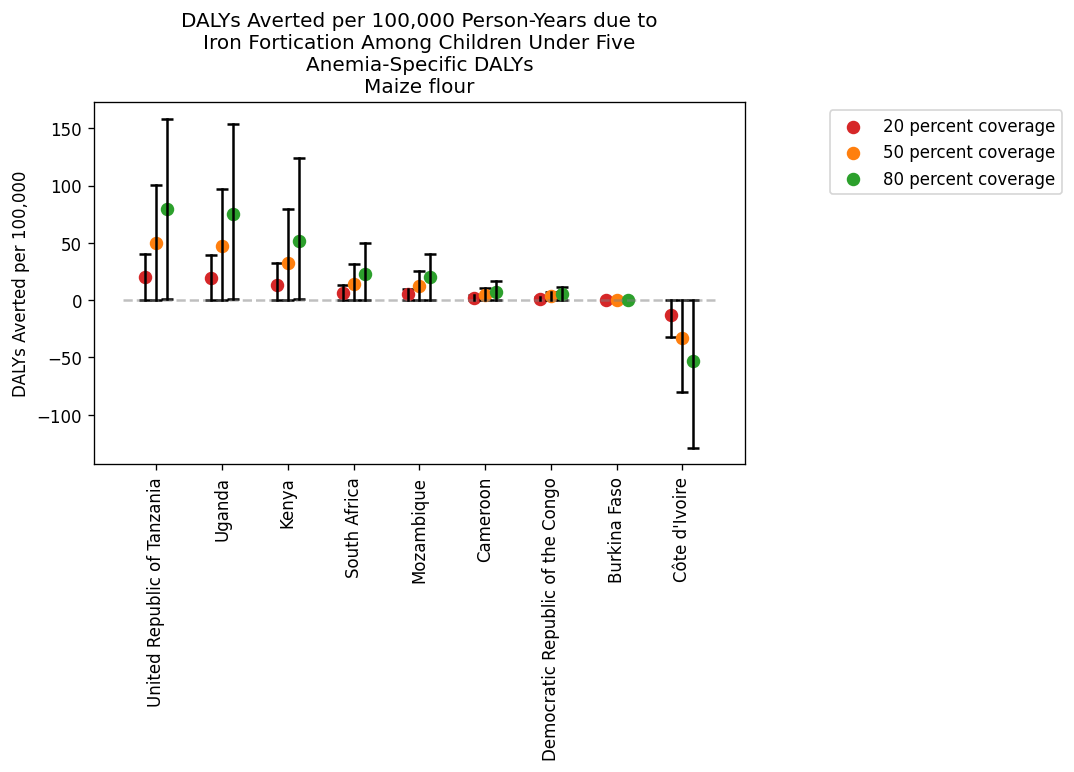

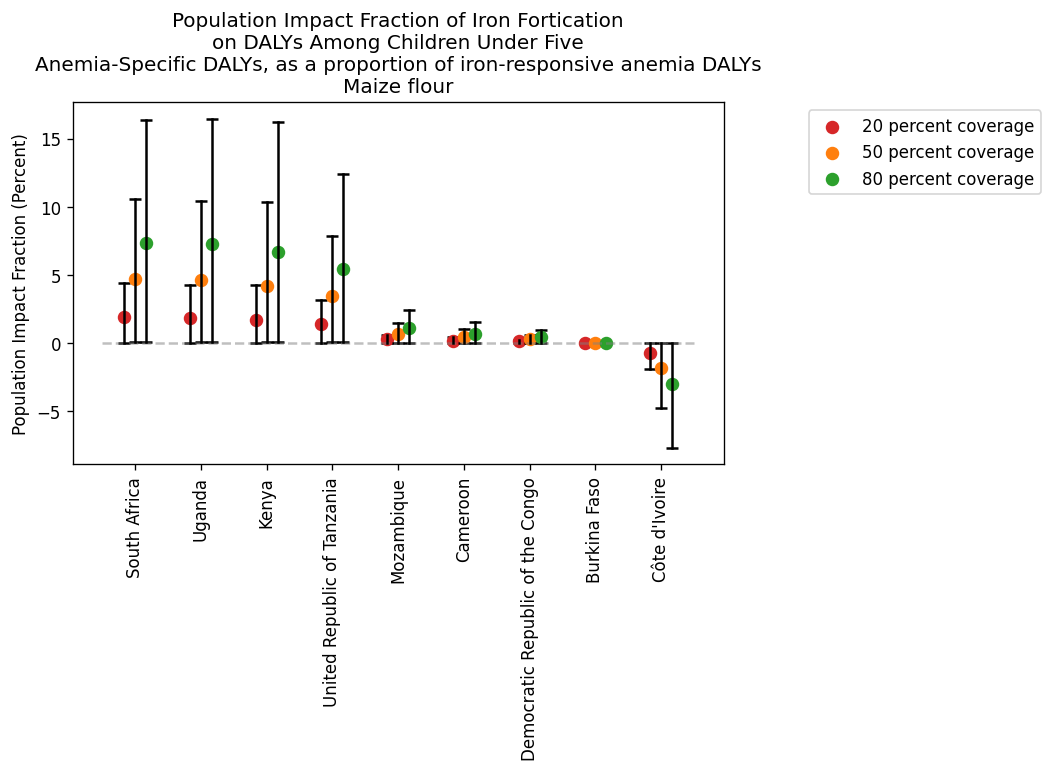

In [26]:
for vehicle in vehicles:
    make_dot_plots(
        (anemia_counts_averted.reset_index()
         .loc[anemia_counts_averted.reset_index().vehicle==vehicle]
         .set_index(['location_id','coverage_level','year'])
         .drop(columns=['measure','vehicle'])), 
        'Iron', 
        'counts', 
        coverage_levels, f'Anemia-Specific DALYs\n{vehicle.capitalize()}',
        f'iron_u5_anemia_counts_averted_{vehicle}')

    make_dot_plots(
        (anemia_rates_averted.reset_index()
         .loc[anemia_rates_averted.reset_index().vehicle==vehicle]
         .set_index(['location_id','coverage_level','year'])
         .drop(columns=['measure','vehicle'])), 
        'Iron', 
        'rates', 
        coverage_levels, f'Anemia-Specific DALYs\n{vehicle.capitalize()}',
        f'iron_u5_anemia_rates_averted_{vehicle}')

    make_dot_plots(
        (anemia_pifs.reset_index()
         .loc[anemia_pifs.reset_index().vehicle==vehicle]
         .set_index(['location_id','coverage_level','year'])
         .drop(columns=['measure','vehicle'])), 
        'Iron', 
        'pifs', 
        coverage_levels, f'Anemia-Specific DALYs, as a proportion of iron-responsive anemia DALYs\n{vehicle.capitalize()}',
        f'iron_u5_anemia_pif_{vehicle}')

# LBWSG to be added ....